In [ ]:
%load_ext autoreload
%autoreload 2

import json
import os
import pickle
from collections import defaultdict
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
from matplotlib.lines import Line2D

from plot_utils import (median_score_compound, median_score_single, npflatten,
                        plot_wrapper, ratio_active_compound,
                        ratio_active_single)

# rcParams.update(matplotlib.rcParamsDefault)
params = {
    #    'axes.labelsize': 8,
    'font.size': 14,

    #    'legend.fontsize': 14,
    #    'xtick.labelsize': 10,
    #    'ytick.labelsize': 10,
    'text.usetex': False,
    #    'figure.figsize': [4.5, 4.5]
}
rcParams.update(params)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# folder structure is as follows:
# /results/{algorithm}/{chid}/{date}/
# algorithm: specific optimization algorithm
# chid: refers to a CHEMBL assay id. 
# date: folders for different runs. the date/time refers to when the run finished

from plot_utils import load_chid
results_dir = Path('results')
algorithm = 'graph_ga'
chids = os.listdir(results_dir/algorithm)
  
order = ['Split1', 'Split2', 'Split1_alt']
col_dict = dict(zip(order, ['blue', 'red', 'green']))
legend_dict = dict(zip(order, ['Optimizer', 'Control', 'Control 2']))

In [ ]:
columns = ['AssayID', 'TargetName', 'TargetID']
rows = [('CHEMBL3888429', 'JAK2', 'CHEMBL2971'),
     ('CHEMBL1909203', 'EGFR', 'CHEMBL203'),
     ('CHEMBL1909140', 'DRD2', 'CHEMBL217')]

assay_info = pd.DataFrame(rows, columns=columns)
chid_name = dict(zip(assay_info['AssayID'], assay_info['TargetName']))
assay_info

,AssayID,TargetName,TargetID
0,CHEMBL3888429,JAK2,CHEMBL2971
1,CHEMBL1909203,EGFR,CHEMBL203
2,CHEMBL1909140,DRD2,CHEMBL217


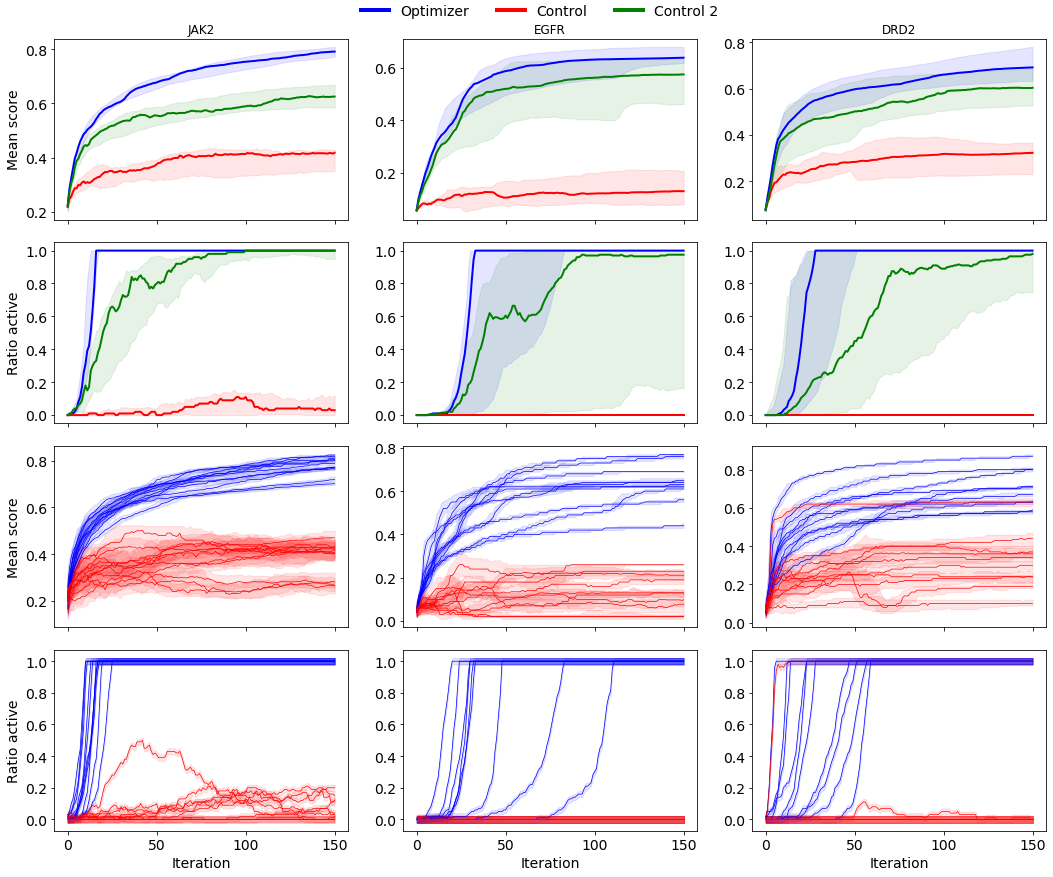

In [ ]:

# some variables for axis labels
xlabel=None
ms = 'Mean score'
ra = 'Ratio active'

#TODO: make better yticks 
fig, axes = plt.subplots(nrows=4, ncols=len(chids), figsize=(15,12), sharex=True)
ax[0][0].set_title(chids[0])

# store aucs while looping
aucs = {}
for i, chid in enumerate(chids):
    summary_dir = results_dir/algorithm/chid/'summary'
    os.makedirs(summary_dir, exist_ok=True)
    
    preds_internal, preds_external, auc = load_chid(results_dir/algorithm/chid, order)
    aucs[chid] = auc
    
    plot_wrapper(preds_internal, median_score_compound, name='median_score_compound', xlabel=xlabel, ylabel=ms, col_dict=col_dict, legend_dict=legend_dict, skip=None, ax=axes[0][i], legend=False, lw=2)
    plot_wrapper(preds_internal, ratio_active_compound, name='ratio_active_compound', xlabel=xlabel, ylabel=ra, col_dict=col_dict, legend_dict=legend_dict, skip=None, ax=axes[1][i], legend=False, lw=2)
    plot_wrapper(preds_internal, median_score_single, name='median_score_single', xlabel=xlabel, ylabel=ms, col_dict=col_dict, legend_dict=legend_dict, skip=True, ax=axes[2][i],legend=False, lw=0.7)
    xlabel = 'Iteration'
    plot_wrapper(preds_internal, ratio_active_single, name='ratio_active_single', xlabel=xlabel, ylabel=ra, col_dict=col_dict,legend_dict=legend_dict, skip=True, ax=axes[3][i], legend=False, lw=0.7)
    xlabel = None
    ms, ra = None, None


fig.tight_layout()
figp = pickle.dumps(fig)

for i, chid in enumerate(chids): axes[0][i].set_title(chid_name[chid], fontsize=12)

custom_lines = [Line2D([0], [0], color=color, lw=4) for color in col_dict.values()]
fig.legend(custom_lines, list(legend_dict.values()), loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.025), frameon=False)

# plt.legend()
# ax[0][1].legend(handles=[1,2,3], loc='center')

#     plt.savefig(summary_dir/f'{name}.pdf')
#     plt.savefig(summary_dir/f'{name}.jpg')
#     plt.show()
#     plt.clf()

# Calculate AUCs with stds

In [ ]:
auc_ms = {}
for chid, auc in aucs.items():
    a = np.concatenate(list(v for v in auc.values()))
    auc_ms[chid] = (a.mean(), a.std())

for chid, (m,s) in auc_ms.items():
    print(f'{chid_name[chid]}: {m:.2f} ± {s:.2f}')

JAK2: 0.78 ± 0.03
EGFR: 0.77 ± 0.05
DRD2: 0.86 ± 0.02



#  Not refactored yet

(10, 151, 100)


KeyboardInterrupt: 

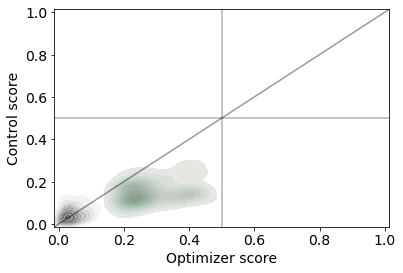

In [ ]:
scatter_kde = summary_dir/'scatter_kde'
os.makedirs(scatter_kde, exist_ok=True)

alpha=0.3
print(pred1_all.shape)
n_ext = 1000

for it in range(pred1_all.shape[1]):
#     fig = plt.figure(figsize=(5,5))
    for run in range(pred1_all.shape[0]):
#         plt.scatter(ext1_all[run][:n_ext], ext2_all[run][:n_ext], s=1, c='black', alpha=0.2)
#         plt.scatter(pred1_all[run, it], pred2_all[run, it], s=3)
        sns.kdeplot(pred1_all[run, it], pred2_all[run, it], shade=True,shade_lowest=False, alpha=0.2)
    sns.kdeplot(ext1_all[run][:n_ext], ext2_all[run][:n_ext], shade=True,shade_lowest=False, alpha=0.5, cmap='Greys')



    plt.axvline(0.5, c='black', alpha=alpha)
    plt.axhline(0.5, c='black',alpha=alpha)
    plt.xlabel('Optimizer score')
    plt.ylabel('Control score')
#         plt.legend(loc=2)
        
    plt.xlim((-0.013,1.013))
    plt.ylim((-0.013,1.013))
    plt.plot((-0.013,1.013), (-0.013,1.013), c='black', alpha=0.4)
    plt.savefig(scatter_kde/f'{it:03}')
#     break
#     plt.show()
    plt.clf()

In [ ]:
alpha=0.3
print(pred1_all.shape)
n_ext = 1000


resh1 = pred1_all.transpose(1,0,2).reshape(151,-1)
resh2 = pred2_all.transpose(1,0,2).reshape(151,-1)

(2, 151, 100)


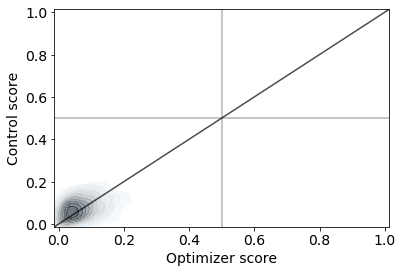

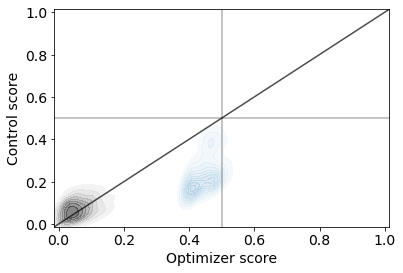

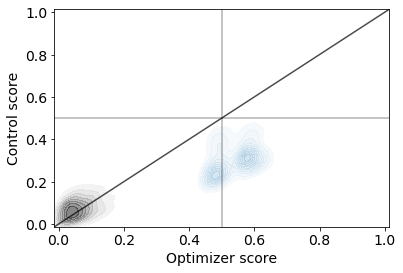

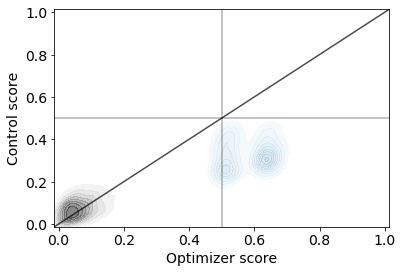

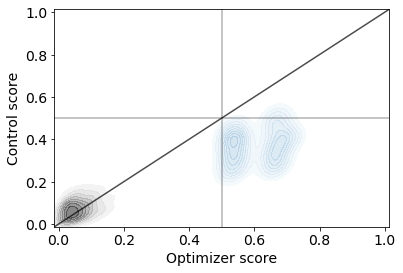

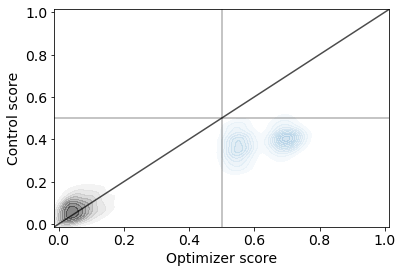

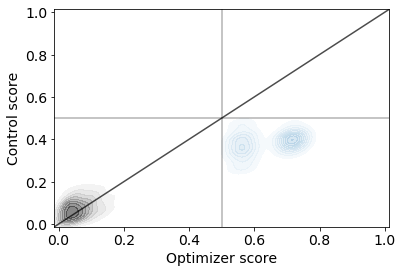

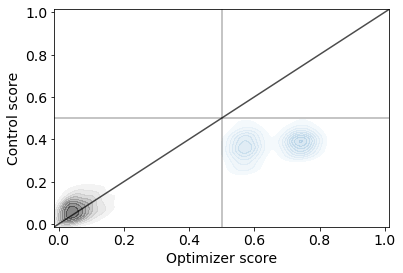

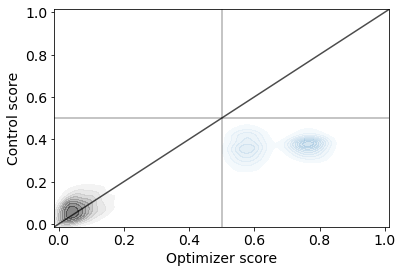

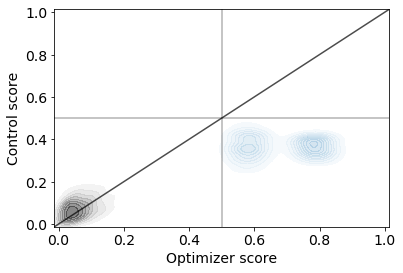

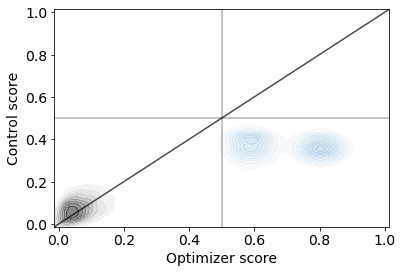

<Figure size 432x288 with 0 Axes>

In [ ]:
for r1, r2 in list(zip(resh1, resh2))[::15]:
    sns.kdeplot(r1, r2, shade=True,shade_lowest=False, alpha=0.2)
#     plt.scatter(r1, r2)
    sns.kdeplot(ext1_all[0][:n_ext], ext2_all[0][:n_ext], shade=True,shade_lowest=False, alpha=0.5, cmap='Greys')


    plt.axvline(0.5, c='black', alpha=alpha)
    plt.axhline(0.5, c='black',alpha=alpha)
    plt.xlabel('Optimizer score')
    plt.ylabel('Control score')
    #         plt.legend(loc=2)

    plt.xlim((-0.013,1.013))
    plt.ylim((-0.013,1.013))
    plt.plot((-0.013,1.013), (-0.013,1.013), c='black', alpha=0.7)
    #     plt.savefig(summary_dir/'scatter'/f'{it:03}')
    #     break
    plt.show()
    plt.clf()

In [ ]:
# summary_dir/'scatter'

# import subprocess
# animation_file = summary_dir/'animation_scatter.gif'
# scatter_glob = summary_dir/'scatter/*'
# subprocess.run(["convert", "-delay 5", "-loop 0", scatter_glob, animation_file])